In [5]:
import numpy as np
import matplotlib.pyplot as plt

Maximum Drawdown: $150.00


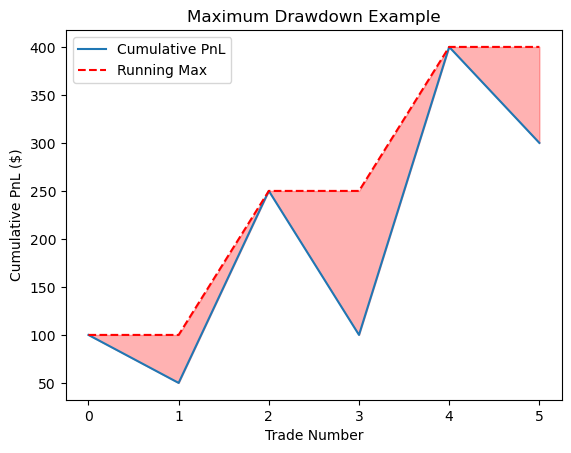

In [13]:
# 1. Maximum Drawdown (MDD) - Largest peek-to-through loss in the trading period.

daily_pnl = np.array([100, -50, 200, -150, 300, -100])

cumulative_pnl = np.cumsum(daily_pnl)
running_max = np.maximum.accumulate(cumulative_pnl)
drawdown = running_max - cumulative_pnl
max_drawdown = np.max(drawdown)

print(f"Maximum Drawdown: ${max_drawdown:.2f}")

plt.plot(cumulative_pnl, label='Cumulative PnL')
plt.plot(running_max, color='red', linestyle='--', label='Running Max')
plt.fill_between(range(len(cumulative_pnl)), cumulative_pnl, running_max, color='red', alpha=0.3)
plt.title('Maximum Drawdown Example')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative PnL ($)')
plt.legend()
plt.show()

In [22]:
# 2. Sharpe Ratio - The risk Adjusted Return or how much return you are getting per unit of risk taken

returns = np.array([0.01, -0.005, 0.02, -0.015, 0.03, -0.01])

sharpe = np.mean(returns) / np.std(returns)
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"For 1 unit of risk taken, you are receiving {sharpe + 1:.2f} back.")

Sharpe Ratio: 0.31
For 1 unit of risk taken, you are receiving 1.31 back.


In [24]:
# 3. Sortino Ratio - How much return you get per unit of downside risk only
# Only negative returns count as "risk", ignoring upside volatility.

downside_returns = returns[returns < 0]
downside_std = np.std(downside_returns)

sortino = np.mean(returns) / downside_std
print(f"Sortino Ratio: {sortino:.2f}")

Sortino Ratio: 1.22


In [25]:
# 4. Kelly Criterion
# Suggests the optimal fraction of capital to risk per trade.

p_win = 0.55
gain = 100
loss = 50
R = gain / loss

kelly_fraction = p_win - (1 - p_win) / R
print(f"Kelly Fraction (optimal bet size per trade): {kelly_fraction:.2%}")

Kelly Fraction (optimal bet size per trade): 32.50%


In [28]:
# 5. Gambler's Ruin
# Probability of losing all capital before reaching a target.

q = 1 - p_win
capital = 1000
unit_bet = 50

prob_ruin = (q / p_win) ** (capital / unit_bet)
print(f"Probability of going broke: {prob_ruin:.2%}")

Probability of going broke: 1.81%
